In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import mglearn

In [113]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [114]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {gbrt.decision_function(X_test).shape}")

X_test.shape: (25, 2)
Decision function shape: (25,)


In [115]:
print(f"Decision function:\n{gbrt.decision_function(X_test)[:6]}")

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [116]:
print(gbrt.decision_function(X_test).shape)
print(gbrt.predict_proba(X_test).shape)

(25,)
(25, 2)


In [117]:
gbrt.decision_function(X_test)

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
       -6.46255955,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
       -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
        4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.67391158])

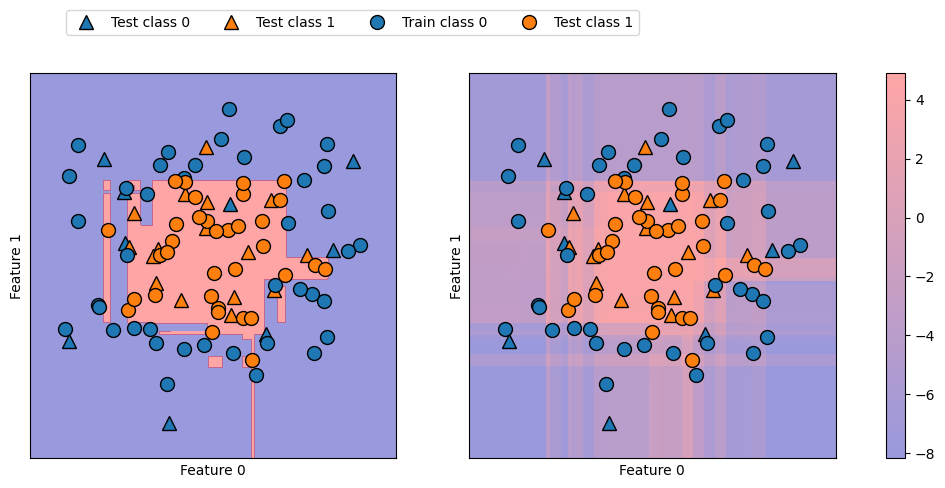

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4,
                                fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=0.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers="o", ax=ax)

    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Test class 1"], ncol=4, loc=(0.1, 1.1))

In [119]:
gbrt.predict_proba(X_test)[:5]

array([[0.01573626, 0.98426374],
       [0.84575653, 0.15424347],
       [0.98112869, 0.01887131],
       [0.97407033, 0.02592967],
       [0.01352142, 0.98647858]])

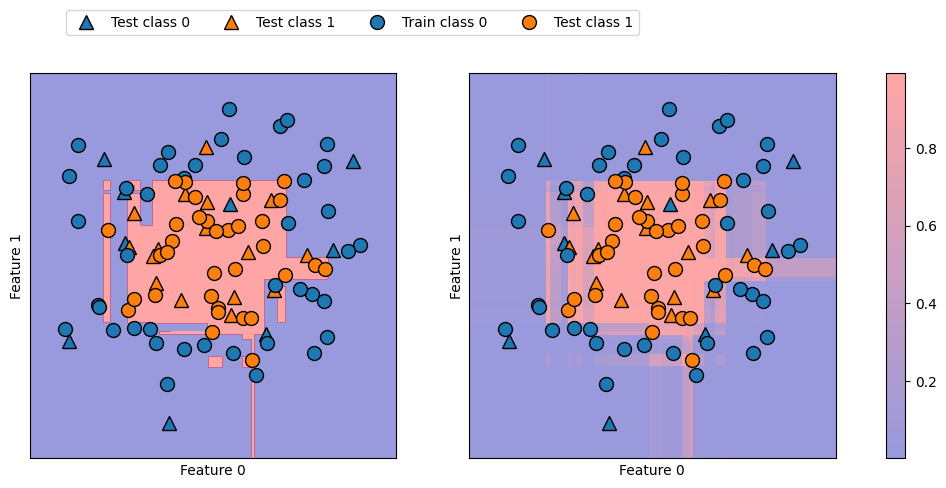

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4,
                                fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=0.4, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers="o", ax=ax)

    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Test class 1"], ncol=4, loc=(0.1, 1.1))

In [121]:
from sklearn.datasets import load_iris

In [122]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state=42)

In [123]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [124]:
print(gbrt.decision_function(X_test).shape)
print(gbrt.predict_proba(X_test).shape)

(38, 3)
(38, 3)


In [125]:
gbrt.decision_function(X_test)

array([[-0.89604809,  1.14724958, -0.82754003],
       [ 1.16113086, -0.80789044, -0.82827067],
       [-0.89091511, -0.77671169,  1.19653416],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89763468,  0.96497584, -0.10374792],
       [ 1.16113086, -0.80789044, -0.82827067],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89710742, -0.77671169,  1.19653416],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89710742, -0.77671169,  1.17829848],
       [ 1.16113086, -0.80789044, -0.82827067],
       [ 1.16113086, -0.80789044, -0.82827067],
       [ 1.16113086, -0.80789044, -0.82827067],
       [ 1.16113086, -0.80789044, -0.82827067],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89120824, -0.77671169,  1.19653416],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89604809,  1.14724958, -0.82754003],
       [-0.89120824, -0.77671169,  1.19653416],
       [ 1.16113086, -0.80789044, -0.828

In [126]:
print(f"Argmax of decision function: \n{np.argmax(gbrt.decision_function(X_test), axis=1)}")
print(f"Predictions: \n{gbrt.predict(X_test)}")

Argmax of decision function: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logreg = LogisticRegression()

In [129]:
named_target = iris["target_names"][y_train]

In [130]:
logreg.fit(X_train, named_target)
print(logreg.classes_)
print(logreg.predict(X_test)[:5])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print(argmax_dec_func[:5])
print(logreg.classes_[argmax_dec_func][:5])

['setosa' 'versicolor' 'virginica']
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
[1 0 2 1 1]
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [131]:
gbrt.predict_proba(X_test).shape

(38, 3)